## Station Quiz - Week 5

Grading Rubric (per question):  
2 points if complete and correct  
1 point if incomplete or incorrect  
0 points if no attempt made  

The following questions should be completed with your mates at the station you decided to sit at today. Your station should designate one person to be the one who submits (commits/pushes) the answers to the quiz in their repo. We'll call this person the **designated submitter**. You all have 50 minutes (i.e. the end of class) to complete these questions. Do not change anything in this file above the line.

***

**#0** Pull this ipynb file from your respective **assignments_section_sp20** repo; either **assignments_section2_sp20** or **assignments_section3_sp20**. Copy it into your personal repo to begin answering the questions, but rename the file as station_quiz_week_04_Netid.ipynb with your Netid. (GitHub)

**#1** Using Markdown syntax (not SAS syntax), make a list of the first and last names all mates (including yourself) at your station, and write the designated submitter's name in **bold** font. (Markdown)  

 Blessing Ibe <br>
 Edward Chen <br>
 Emily Ciaccio <br>
 Mehmet Yalcin Aydin <br>
 Brein Mosely <br>
 Junjing Liu <br>
 **Andro Manukov** <br>

**#2** Using the visualization below, describe what's happening in the plot and the relationship among the variables in it.
![](https://uofi.box.com/shared/static/eiywdqla5l5dqsbz3mblbrj0kxbcnn37.png)


This visualization shows the percent of women by race, by highest education level, and by whether they were born in the United States or not. From this visualization, we can see that a higher percentage of women born in the United States have a Master's degree (or higher) than women born outside of the United States. It is also apparent that there is a higher percentage of women born in the United States who have a degree than women born outside of the United States. Whether a woman was born in the United States or not is associated with the highest level of education. We can also see that Asian Indians have the highest percentage of women with a Master's degree or higher, compared to the other races in the visualization.

**#3**  Now, physically move to another station and ask one person the same questions in **Problem 2** (above). Write down their first and last name as well as their answers to those questions get credit for this **Problem 3** with Markdown syntax.  

Tatiana Klein. Tatiana had the same ideas as our group and also said that the visualization shows highest education level of women by race and birth place. She also noted that a higher percentage of women born in the United States have a Master's degree or higher than women born outside of the United States.

**#4** Look through the *data key* (see datasets.html on course website) to get more familiar with the data. Run the code below to import and merge the US Natality Data's first 3 parts such that it:  
  - creates a new variable called "congenital_anomaly_bin" which equals 1 if a newborn has any of the 12 congenital anomalies (CA_ANEN, CA_MNSB, CA_CCHD, CA_CDH, CA_OMPH, CA_GAST, CA_LIMB, CA_CLEFT, CA_CLPAL, CA_DOWN, CA_DISOR, CA_HYPO) and equals 0 otherwise
  - creates a new variable called "dbwtlbs" which is the baby's birth weight (DBWT) in pounds
  - keeps only the following variables: obstetric estimate recode 3 (OEGest_R3), baby's assigned sex (SEX), mother's age (MAGER), father's age (FAGECOMB), mother's education level (MEDUC), father's education level (FEDUC), number of prenatal care visits (PREVIS_REC), whether mother smoked cigarettes ever (CIG_REC), mother's weight gain in pounds (WTGAIN), delivery method (DMETH_REC), congenital_anomaly_bin, and dbwtlbs
  - removes all unknown or unstated values from the kept variables
  - filters on twins
  - rename the data object as "birtha". (SAS, Accessing and Importing Data, Data Wrangling)

```
options nosource nonotes errors=0;
filename nat1 url "https://uofi.box.com/shared/static/gb07nz7jafspk65wzxq6awlu02kypiq7.csv" termstr=crlf;
filename nat2 url "https://uofi.box.com/shared/static/kr2s5wp3jpxdlpcjmq2qs15oo4797u4y.csv" termstr=crlf;
filename nat3 url "https://uofi.box.com/shared/static/hwsoobqngb8zfyjbwxvmrejjz1lg3yeh.csv" termstr=crlf;
proc import datafile=nat1 out=birth01(keep = dplural CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC dbwt) replace dbms=csv; 
run;
proc import datafile=nat2 out=birth02(keep = dplural CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC dbwt) replace dbms=csv; 
run;
proc import datafile=nat3 out=birth03(keep = dplural CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC dbwt) replace dbms=csv; 
run;
data birtha;
 set birth01 birth02 birth03;
 dbwtlbs = dbwt/454;
 if CA_ANEN='Y' or CA_MNSB='Y' or CA_CCHD='Y' or CA_CDH='Y' or CA_OMPH='Y' or CA_GAST='Y' or CA_LIMB='Y' or CA_CLEFT='Y' or CA_CLPAL='Y' or CA_DOWN='C' or CA_DISOR='C' or CA_HYPO='Y' then congenital_anomaly_bin=1;
  else congenital_anomaly_bin=0;
 if dplural=2 and dbwt ne 9999 and OEGest_R3 ne 3 and FAGECOMB ne 99 and MEDUC ne 9 and FEDUC ne 9 and PREVIS_REC ne 9 and wtgain ne 99 and dmeth_rec ne 9;
 keep dplural OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC congenital_anomaly_bin dbwtlbs;
run;
options source notes errors=20;
```

To get credit for this problem all you have to do is run the code above and print the first 10 observations of birtha with only the variables: sex, dbwtlbs, and oegest_r3.

In [1]:
options nosource nonotes errors=0;
filename nat1 url "https://uofi.box.com/shared/static/gb07nz7jafspk65wzxq6awlu02kypiq7.csv" termstr=crlf;
filename nat2 url "https://uofi.box.com/shared/static/kr2s5wp3jpxdlpcjmq2qs15oo4797u4y.csv" termstr=crlf;
filename nat3 url "https://uofi.box.com/shared/static/hwsoobqngb8zfyjbwxvmrejjz1lg3yeh.csv" termstr=crlf;
proc import datafile=nat1 out=birth01(keep = dplural CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC dbwt) replace dbms=csv; 
run;
proc import datafile=nat2 out=birth02(keep = dplural CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC dbwt) replace dbms=csv; 
run;
proc import datafile=nat3 out=birth03(keep = dplural CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC dbwt) replace dbms=csv; 
run;
data birtha;
 set birth01 birth02 birth03;
 dbwtlbs = dbwt/454;
 if CA_ANEN='Y' or CA_MNSB='Y' or CA_CCHD='Y' or CA_CDH='Y' or CA_OMPH='Y' or CA_GAST='Y' or CA_LIMB='Y' or CA_CLEFT='Y' or CA_CLPAL='Y' or CA_DOWN='C' or CA_DISOR='C' or CA_HYPO='Y' then congenital_anomaly_bin=1;
  else congenital_anomaly_bin=0;
 if dplural=2 and dbwt ne 9999 and OEGest_R3 ne 3 and FAGECOMB ne 99 and MEDUC ne 9 and FEDUC ne 9 and PREVIS_REC ne 9 and wtgain ne 99 and dmeth_rec ne 9;
 keep dplural OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC congenital_anomaly_bin dbwtlbs;
run;
options source notes errors=20;

SAS Connection established. Subprocess id is 3839



In [3]:
proc print data = birtha (obs = 10);
var sex dbwtlbs oegest_r3;
run;

Obs,SEX,dbwtlbs,OEGEST_R3
1,M,6.11233,1
2,F,5.04405,1
3,F,6.61894,2
4,F,5.87004,2
5,M,5.77093,1
6,F,5.30837,1
7,F,3.86564,1
8,M,3.87665,1
9,F,6.97137,2
10,M,6.35463,2


**#5** According to the Mayo Clinic, "a premature birth is one that occurs before the start of the 37th week of pregnancy." The new gestational age standard for the NCHS is the obstetric estimate of gestation at delivery (OE). The variable of interest in the birtha data for determining if a baby is born prematurely is the obstetric estimate recode 3 (OEGest_R3).

With SAS, create a new subset of the birtha data called "premies" that: 
  - sorts the data by baby's birth weight (dbwtlbs) in ascending order
  - filters so that we only keep observations that have obstetric estimates under 37 weeks (OEGest_R3).

Now, print the first 10 observations of premies with only the variables: sex, dbwtlbs, oegest_r3. *Be sure to use the options statement to prevent extaneous SAS output for your data step.* (SAS, Data Wrangling)  

In [21]:
data premies;
	set birtha;
	if OEGest_R3 = 1;
run;

proc sort data = premies;
	by dbwtlbs;
run;

proc print data = premies (obs=10);
	var sex dbwtlbs OEGest_R3;
Run;


Obs,SEX,dbwtlbs,OEGEST_R3
1,F,0.50220,1
2,F,0.50661,1
3,M,0.51762,1
4,M,0.52863,1
5,F,0.52863,1
6,F,0.53084,1
7,M,0.54185,1
8,M,0.54846,1
9,M,0.55066,1
10,F,0.55066,1


**#6** Using SAS code and beginning with the premies data in **Problem 5**, compare the distributions of the birth weight in pounds (dbwtlbs) for male and female (SEX) premies. Describe the distributions and and whether they deviate strongly from normality or not by using a histogram for each sex. *You must use ods select which forces SAS to only show the histogram to get full credit for this problem.* (SAS, Data Descriptives, Data Visualization, Markdown)


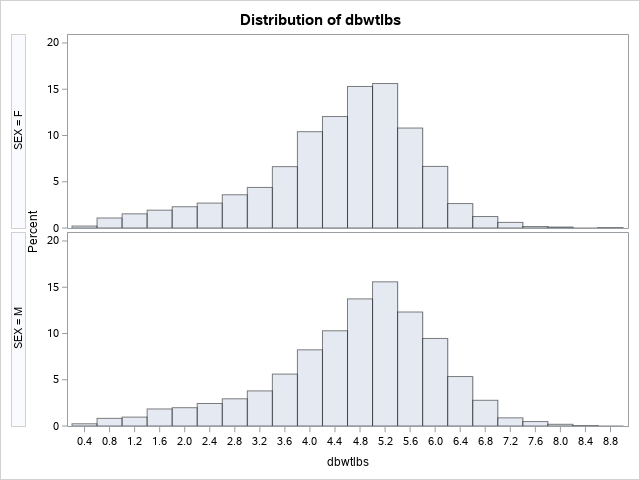

In [18]:
proc univariate data=premies;
 class SEX;
 histogram dbwtlbs;
 ods select histogram;
run;

Both histograms look slightly skewed to the right but otherwise they are similar to the normal distribution.

**#7** Using SAS code and beginning with the premies data in **Problem 5**, fit a "best" linear regression model to predict baby's birth weight in pounds (dbwtlbs) with the following predictors: mother's age (MAGER), father's age (FAGECOMB), and mother's weight gain in pounds (WTGAIN). 

*The "best" means you should choose among a set of models either manually, using a criterion, or automatic selection. congenital_anomaly_bin should be not be treated as a categorical predictor. Do not partition the data into training and testing sets.*

What is the model telling us? Describe the results of the model and how good it is at predicting a baby's birth weight. (SAS, GLM - Linear Regression, Data Visualization, Markdown)

In [22]:
proc reg data = premies;
	model dbwtlbs = MAGER FAGECOMB WTGAIN;
	ods select parameterestimates;
run;

proc reg data = premies;
	model dbwtlbs = MAGER FAGECOMB WTGAIN / selection = backward sls = .05;
	ods select selectionsummary;
run;

proc reg data = premies;
	model dbwtlbs = MAGER FAGECOMB WTGAIN / selection = stepwise sls = .05 sle = .05;
	ods select selectionsummary;
run;

proc reg data = premies;
	model dbwtlbs = MAGER FAGECOMB WTGAIN / selection = forward sle = .05;
	ods select selectionsummary;
run;

proc reg data = premies;
	model dbwtlbs = FAGECOMB;
	ods select parameterestimates fitstatistics;
run;

proc reg data = premies;
	model dbwtlbs = MAGER WTGAIN;
	ods select parameterestimates fitstatistics;
run;

ods text = "Based on our selection processes, we picked MAGER and WTGAIN as our predictors for DBWTLBS. Holding WTGAIN constant, a one unit increase in MAGER would increase the baby's weight by 0.00820 units. Holding MAGER constant, a unit increase in WTGAIN would increase the baby's weight by 0.02691 units. Though this was the best model fit, the predictors only explain 11.26% variation in the data, meaning this is not a great predictive model."



**#8** Using SAS code and beginning with the birtha data's variables mager, fagecomb, wtgain, and dbwtlbs in **Problem 4**, recreate the data visualization below. *You must use ods select which forces SAS to only show the plot to get full credit for this problem..* (SAS, Principal Components Analysis, Data Visualization, Markdown)

![](https://uofi.box.com/shared/static/af2thlxoagp7nzrydllf8e64xtodk0xl.png)


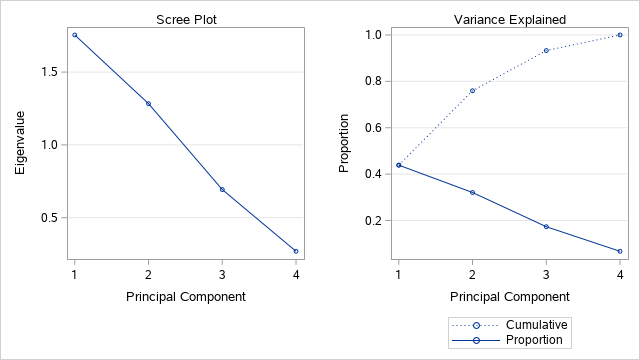

In [6]:
proc princomp data=birtha out=pcbirth outstat=pcstatbirth plots=(scree score);
 var mager fagecomb wtgain dbwtlbs;
 ods select ScreePlot;
run;

**#9** Using SAS code and beginning with the birtha data in **Problem 4**, fit a "best" logistic regression model to predict whether a baby is born prematurely or not (OEGest_R3) with the following predictors: mother's education level (MEDUC), mother's age (MAGER), number of prenatal visits (PREVIS_REC), whether mother smoked cigarettes ever (CIG_REC), delivery method (DMETH_REC), and baby's birth weight in pounds (dbwtlbs).  

*The "best" means you should choose among a set of models either manually, using a criterion, or automatic selection. CIG_REC should be treated as a categorical predictor with Yes being the reference level. DMETH_REC should be treated as a categorical predictor with Vaginal being the reference level. Do not partition the data into training and testing sets.*

What is the model telling us? Describe the results of the model and how good it is at predicting a baby's birth weight. (SAS, GLM - Logistic Regression, Data Visualization, Markdown)

In [25]:
/*Logistic Regression*/
proc logistic data=birtha;
 class CIG_REC DMETH_REC / param=ref ref=first;
 model OEGest_R3(event="1") = MEDUC MAGER PREVIS_REC CIG_REC DMETH_REC dbwtlbs;
 ods select parameterestimates;
run;

proc logistic data=birtha;
 class CIG_REC DMETH_REC / param=ref ref=first;
 model OEGest_R3(event="1") = MEDUC MAGER PREVIS_REC CIG_REC DMETH_REC dbwtlbs / rsquare;
 output out=predz predprobs=individual;
 ods select association rsquare;
run;
proc sort data=predz;
 by descending OEGest_R3 descending _INTO_ ;
run;
proc freq data=predz order=data;
 table OEGest_R3 * _INTO_ / out=confmat;
run;
data confmat;
 set confmat;
 match=0;
 if OEGest_R3 =_INTO_ then match=1;
 run;
proc means data=confmat mean;
 freq count;
 var match;
run;

/*select the regression model using forward selection*/
proc logistic data=birtha ;
 class CIG_REC DMETH_REC / param=ref ref=first;
 model OEGest_R3(event="1") = MEDUC MAGER PREVIS_REC CIG_REC DMETH_REC dbwtlbs / selection=forward sle=0.05;
 ods select modelbuildingsummary;
run;

proc logistic data=birtha;
 class MEDUC CIG_REC DMETH_REC / param=ref ref=first;
 model OEGest_R3(event="1") =  PREVIS_REC CIG_REC DMETH_REC dbwtlbs / rsquare;
 output out=predz predprobs=individual;
 ods select association rsquare;
run;
proc sort data=predz;
 by descending OEGest_R3 descending _INTO_ ;
run;
proc freq data=predz order=data;
 table OEGest_R3 * _INTO_ / out=confmat;
run;
data confmat;
 set confmat;
 match=0;
 if OEGest_R3 =_INTO_ then match=1;
 run;
proc means data=confmat mean;
 freq count;
 var match;
run;

ods text = "The model tells us that 76.2% of the results matched with the actual results."

At first we have an 8 predictor model and the match ended up being .7611247 and then we used the foward step selection we were left with 5 predictors (dbwtlbs, PREVIS_REC, DMETH_REC, CIG_REC, MEDUC) and ended up with a slightly improved match of .7620390

**#10** Using SAS code and beginning with the birtha data in **Problem 4**, use a "best" linear discriminant analysis to predict whether a baby is born prematurely or not (OEGest_R3) with the following predictors: mother's education level (MEDUC), mother's age (MAGER), number of prenatal visits (PREVIS_REC), whether mother smoked cigarettes ever (CIG_REC), delivery method (DMETH_REC), and baby's birth weight in pounds (dbwtlbs).

*The "best" means you should choose among a set of models either manually, using a criterion, or automatic selection. CIG_REC should be treated as a categorical predictor with Yes being the reference level. DMETH_REC should be treated as a categorical predictor with Vaginal being the reference level.* **This is a trick question!** *Do not partition the data into training and testing sets.*

What is the model telling us? Describe the results of the model and how good it is at predicting a baby's birth weight. (SAS, Discriminant Analysis, Data Visualization, Markdown)

In [27]:
proc discrim data=birtha outstat=birthasetrez pool=test manova;
 class OEGest_R3;
 var PREVIS_REC  DMETH_REC dbwtlbs ;
 ods exclude logdet distgeneralized errorresub errortestclass classifiedresub classifiedtestclass;
run;

proc discrim data=birtha outstat=trainingsetrez pool=test manova;
 class  OEGest_R3;
 var PREVIS_REC  DMETH_REC dbwtlbs;
 priors prop;
 ods exclude logdet distgeneralized errorresub errortestclass classifiedresub classifiedtestclass;
run;

proc discrim data=birtha outstat=trainingsetrez pool=test manova;
 class  OEGest_R3;
 var PREVIS_REC  dbwtlbs;
 priors prop;
 ods exclude logdet distgeneralized errorresub errortestclass classifiedresub classifiedtestclass;
run;

ods text = "Since the P-value is less than .0001, the model is statistically significant. The discriminate analysis model shows promise as well. Then we did the model selection manually, deleted DMETH_REC variable, and the p value is still signifiant. Then the small model should be a little bit better than the old one."

**#00** The **designated submitter** should commit and push the file to their repo with the commit message "All Done".